In [1]:
library(SnowballC)
library(tm)
library(ggplot2)
library(wordcloud)
library(tidytext)
library(syuzhet)
library(dplyr)
library(stringr)
library(pryr)
library(tidyr)
library(reshape)
library(lubridate)
library(Rgraphviz)
library(graph)
#library(twitteR, lib.loc="../r-libs")

Loading required package: NLP

Attaching package: ‘ggplot2’

The following object is masked from ‘package:NLP’:

    annotate

Loading required package: RColorBrewer

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘pryr’

The following object is masked from ‘package:tm’:

    inspect


Attaching package: ‘reshape’

The following objects are masked from ‘package:tidyr’:

    expand, smiths

The following object is masked from ‘package:dplyr’:

    rename


Attaching package: ‘lubridate’

The following object is masked from ‘package:reshape’:

    stamp

The following object is masked from ‘package:base’:

    date

Loading required package: graph
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clu

In [2]:
#READ IN THE TWITTER NOTEBOOKS
tweets = read.csv('../Resources/rawtwitter.csv')
#CONVERT DATE/TIME FIELD OT YEAR
tweets$created_at <- as.Date(tweets$created_at, format= "%Y-%m-%d")
tweets$year <- year(tweets$created_at)


In [3]:
#CREATING A VECTOR CORPUS, CONVERT TEXT TO LOWERCASE, REMOVE NUMBERS, REMOVE BASIC WORDS AND SELECT WORDS. GET RID OF PUNCTUATION AND ANY SPACES.
myCorpus <- VCorpus(VectorSource(tweets$text))
myCorpus <- tm_map(myCorpus, content_transformer(tolower))
myCorpus <- tm_map(myCorpus, removeNumbers)
myCorpus <- tm_map(myCorpus, removeWords, c(stopwords("english"),"metar","sfc","ovc","clr","mph","auto","rmk","bkn","slp","wind","wnd","sky","rain","pres","slp","can","fhum","via","tornado","sct","cltwx","temp","may","gkt","vis","winds","clear","fhum","awos"))
myCorpus <- tm_map(myCorpus, removePunctuation)
myCorpus <- tm_map(myCorpus, stripWhitespace)

#CREATE INTO A DATAFRAME BASED ON FREQUENCY

dtm <- TermDocumentMatrix(myCorpus)
dtm <- removeSparseTerms(dtm, .99)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)







In [4]:
#SORTING the frequency
word.freq <- head(sort(rowSums(m), decreasing = T),20)
cloud.freq<-sort(rowSums(m), decreasing = T)
names(word.freq)

[1] "outbreak"    "vaccine"     "cough"       "whooping"    "flu"        
 [6] "immunity"    "health"      "new"         "measles"     "polio"      
[11] "get"         "vaccination" "news"        "jenny"       "pertussis"  
[16] "cases"       "mccarthy"    "like"        "now"         "just"

In [5]:
#CREATING A DATAFRAME WITH THE TOP 20 WORDS
graphd<-head(d,20)

In [6]:
#WRITING OUT AN IMAGE AND LISTING THE WORD ASSOCIATION
png("TermRel", width=8, height=6, units="in", res=300)
plot(dtm, terms = names(word.freq), corThreshold = 0.1, weighting = T, attrs=list(node=list(label="2", fillcolor="pink",fontsize=24,height=1.8,width=3),edge=list(color="cyan",width="3")))

In [7]:
#LETS SEE EVERYTHING IN THOUSANDS INSTEAD OF SCIENTIFIC NOTATION
options(scipen=10000)

In [8]:
#PRINTING OUT THE WORD FREQUENCY COUNT FOR ALL WORDS HERE AS SEEN ABOVE
png("WordFreqCountAll.png", width=4, height=4, units="in", res=300)
ggplot(graphd, aes(x = reorder(word, -freq), y=freq)) + geom_bar(stat="identity") +
xlab("Terms") + ylab("Count") + coord_flip() +
theme(axis.text=element_text(size=7))

dev.off()

png 
  2

Warning message in wordcloud(words = names(word.freq), freq = word.freq, min.freq = 10000, :
“outbreak could not be fit on page. It will not be plotted.”Warning message in wordcloud(words = names(word.freq), freq = word.freq, min.freq = 10000, :
“whooping could not be fit on page. It will not be plotted.”

png 
  2

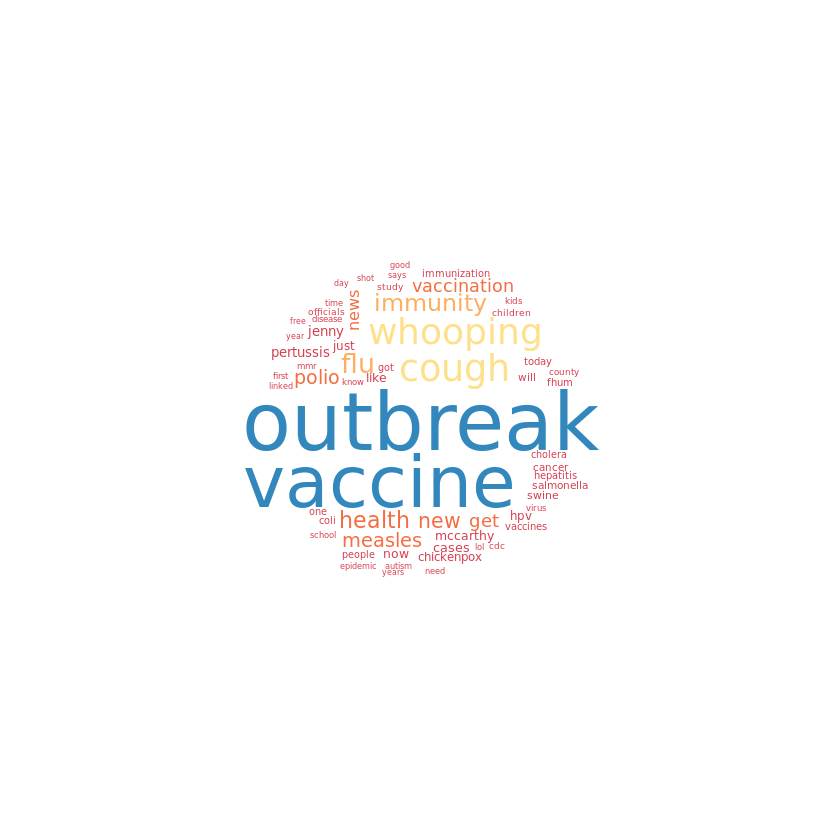

In [9]:
#LETS LOOK AT THE WORD CLOUD FOR ALL YEARS COMBINED
wordcloud <- wordcloud(words = names(cloud.freq), freq = cloud.freq, min.freq = 10000,
random.order = F, colors = brewer.pal(8, "Spectral"), scale = c(4,0.2), max.words = 100)
png("WordCloudAll.png", width=3, height=3, units="in", res=300)
 
 wordcloud(words = names(word.freq), freq = word.freq, min.freq = 10000,
random.order = F, colors = brewer.pal(8, "Spectral"), scale = c(4,0.2), max.words = 100, rot.per=0.35)
 
dev.off()


In [3]:
#TO SPLIT OUT THE WORD CLOUDS, LETS SUBSET THE TWEETS BY YEAR
tweet07 <- subset(tweets, year = 2007)
tweet08 <- subset(tweets, year = 2008)
tweet09 <- subset(tweets, year = 2009)
tweet10 <- subset(tweets, year = 2010)
tweet11 <- subset(tweets, year = 2011)
tweet12 <- subset(tweets, year = 2012)
tweet13 <- subset(tweets, year = 2013)
tweet14 <- subset(tweets, year = 2014)
tweet15 <- subset(tweets, year = 2015)
tweet16 <- subset(tweets, year = 2016)
tweet17 <- subset(tweets, year = 2017)


In [11]:
#SAME AS ABOVE, GETTING THE TERM FREQUENCY AND THEN PLOTTING WORD CLOUD FOR 2007
myCorpus07 <- VCorpus(VectorSource(tweet07$text))
myCorpus07 <- tm_map(myCorpus07, content_transformer(tolower))
myCorpus07 <- tm_map(myCorpus07, removeNumbers)
myCorpus07 <- tm_map(myCorpus07,  removeWords, c(stopwords("english"),"metar","sfc","ovc","clr","mph","auto","rmk","bkn","slp","wind","wnd","sky","rain","pres","slp","can","fhum","via","tornado","sct","cltwx","temp","may","gkt","vis","winds","clear","fhum","awos"))
myCorpus07 <- tm_map(myCorpus07, removePunctuation)
myCorpus07 <- tm_map(myCorpus07, stripWhitespace)

dtm07 <- TermDocumentMatrix(myCorpus07)
dtm07 <- removeSparseTerms(dtm07, .99)
m07 <- as.matrix(dtm07)
v07 <- sort(rowSums(m07),decreasing=TRUE)
d07 <- data.frame(word = names(v07),freq=v07)
word.freq07 <- sort(rowSums(m07), decreasing = T)

png("WordCloud07.png", width=3, height=3, units="in", res=300)
wordcloud(words = names(word.freq07), freq = word.freq07, min.freq = 10000,
random.order = F, colors = brewer.pal(8, "Spectral"), scale = c(4,0.2), max.words = 100, rot.per=0.35)

dev.off()

Warning message in wordcloud(words = names(word.freq07), freq = word.freq07, min.freq = 10000, :
“outbreak could not be fit on page. It will not be plotted.”

png 
  2

In [12]:
#SAME AS ABOVE, GETTING THE TERM FREQUENCY AND THEN PLOTTING WORD CLOUD FOR 2008
myCorpus08 <- VCorpus(VectorSource(tweet08$text))
myCorpus08 <- tm_map(myCorpus08, content_transformer(tolower))
myCorpus08 <- tm_map(myCorpus08, removeNumbers)
myCorpus08 <- tm_map(myCorpus08, removeWords,  c(stopwords("english"),"metar","sfc","ovc","clr","mph","auto","rmk","bkn","slp","wind","wnd","sky","rain","pres","slp","can","fhum","via","tornado","sct","cltwx","temp","may","gkt","vis","winds","clear","fhum","awos"))
myCorpus08 <- tm_map(myCorpus08, removePunctuation)
myCorpus08 <- tm_map(myCorpus08, stripWhitespace)

dtm08 <- TermDocumentMatrix(myCorpus08)
dtm08 <- removeSparseTerms(dtm08, .99)
m08 <- as.matrix(dtm08)
v08 <- sort(rowSums(m08),decreasing=TRUE)
d08 <- data.frame(word = names(v08),freq=v08)
word.freq08 <- sort(rowSums(m08), decreasing = T)
png("WordCloud08.png", width=3, height=3, units="in", res=300)
    wordcloud(words = names(word.freq08), freq = word.freq08, min.freq = 10000,
random.order = F, colors = brewer.pal(8, "Spectral"), scale = c(4,0.2), max.words = 100, rot.per=0.35)
dev.off()

Warning message in wordcloud(words = names(word.freq08), freq = word.freq08, min.freq = 10000, :
“outbreak could not be fit on page. It will not be plotted.”Warning message in wordcloud(words = names(word.freq08), freq = word.freq08, min.freq = 10000, :
“whooping could not be fit on page. It will not be plotted.”

png 
  2

In [13]:
#SAME AS ABOVE, GETTING THE TERM FREQUENCY AND THEN PLOTTING WORD CLOUD FOR 2009
myCorpus09 <- VCorpus(VectorSource(tweet09$text))
myCorpus09 <- tm_map(myCorpus09, content_transformer(tolower))
myCorpus09 <- tm_map(myCorpus09, removeNumbers)
myCorpus09 <- tm_map(myCorpus09,  removeWords, c(stopwords("english"),"metar","sfc","ovc","clr","mph","auto","rmk","bkn","slp","wind","wnd","sky","rain","pres","slp","can","fhum","via","tornado","sct","cltwx","temp","may","gkt","vis","winds","clear","fhum","awos"))
myCorpus09 <- tm_map(myCorpus09, removePunctuation)
myCorpus09 <- tm_map(myCorpus09, stripWhitespace)
dtm09 <- TermDocumentMatrix(myCorpus09)
dtm09 <- removeSparseTerms(dtm09, .99)
m09 <- as.matrix(dtm09)
v09 <- sort(rowSums(m09),decreasing=TRUE)
d09 <- data.frame(word = names(v09),freq=v09)
word.freq09 <- sort(rowSums(m09), decreasing = T)


png("WordCloud09.png", width=3, height=3, units="in", res=300)
wordcloud(words = names(word.freq09), freq = word.freq09, min.freq = 10000,
random.order = F, colors = brewer.pal(8, "Spectral"), scale = c(4,0.2), max.words = 100, rot.per=0.35)

dev.off()


Warning message in wordcloud(words = names(word.freq09), freq = word.freq09, min.freq = 10000, :
“outbreak could not be fit on page. It will not be plotted.”Warning message in wordcloud(words = names(word.freq09), freq = word.freq09, min.freq = 10000, :
“whooping could not be fit on page. It will not be plotted.”

png 
  2

In [4]:
#SAME AS ABOVE, GETTING THE TERM FREQUENCY AND THEN PLOTTING WORD CLOUD FOR 2010
myCorpus10 <- VCorpus(VectorSource(tweet10$text))
myCorpus10 <- tm_map(myCorpus10, content_transformer(tolower))
myCorpus10 <- tm_map(myCorpus10, removeNumbers)
myCorpus10 <- tm_map(myCorpus10,  removeWords, c(stopwords("english"),"metar","sfc","ovc","clr","mph","auto","rmk","bkn","slp","wind","wnd","sky","rain","pres","slp","can","fhum","via","tornado","sct","cltwx","temp","may","gkt","vis","winds","clear","fhum","awos"))
myCorpus10 <- tm_map(myCorpus10, removePunctuation)
myCorpus10 <- tm_map(myCorpus10, stripWhitespace)

dtm10 <- TermDocumentMatrix(myCorpus10)
dtm10 <- removeSparseTerms(dtm10, .99)
m10 <- as.matrix(dtm10)
v10 <- sort(rowSums(m10),decreasing=TRUE)
d10 <- data.frame(word = names(v10),freq=v10)
word.freq10 <- sort(rowSums(m10), decreasing = T)

png("WordCloud10.png", width=3, height=3, units="in", res=300)
wordcloud(words = names(word.freq10), freq = word.freq10, min.freq = 10000,
random.order = F, colors = brewer.pal(8, "Spectral"), scale = c(4,0.2), max.words = 100, rot.per=0.35)

dev.off()



Warning message in wordcloud(words = names(word.freq10), freq = word.freq10, min.freq = 10000, :
“outbreak could not be fit on page. It will not be plotted.”

png 
  2

In [5]:
#SAME AS ABOVE, GETTING THE TERM FREQUENCY AND THEN PLOTTING WORD CLOUD FOR 2011
myCorpus11 <- VCorpus(VectorSource(tweet11$text))
myCorpus11 <- tm_map(myCorpus11, content_transformer(tolower))
myCorpus11 <- tm_map(myCorpus11, removeNumbers)
myCorpus11 <- tm_map(myCorpus11,  removeWords, c(stopwords("english"),"metar","sfc","ovc","clr","mph","auto","rmk","bkn","slp","wind","wnd","sky","rain","pres","slp","can","fhum","via","tornado","sct","cltwx","temp","may","gkt","vis","winds","clear","fhum","awos"))
myCorpus11 <- tm_map(myCorpus11, removePunctuation)
myCorpus11 <- tm_map(myCorpus11, stripWhitespace)

dtm11 <- TermDocumentMatrix(myCorpus11)
dtm11 <- removeSparseTerms(dtm11, .99)
m11 <- as.matrix(dtm11)
v11 <- sort(rowSums(m11),decreasing=TRUE)
d11 <- data.frame(word = names(v11),freq=v11)
word.freq11 <- sort(rowSums(m11), decreasing = T)


png("WordCloud11.png", width=3, height=3, units="in", res=300)
wordcloud(words = names(word.freq11), freq = word.freq11, min.freq = 10000,
random.order = F, colors = brewer.pal(8, "Spectral"), scale = c(4,0.2), max.words = 100, rot.per=0.35)

dev.off()


Warning message in wordcloud(words = names(word.freq11), freq = word.freq11, min.freq = 10000, :
“outbreak could not be fit on page. It will not be plotted.”

png 
  2

In [6]:
#SAME AS ABOVE, GETTING THE TERM FREQUENCY AND THEN PLOTTING WORD CLOUD FOR 2012
myCorpus12 <- VCorpus(VectorSource(tweet12$text))
myCorpus12 <- tm_map(myCorpus12, content_transformer(tolower))
myCorpus12 <- tm_map(myCorpus12, removeNumbers)
myCorpus12 <- tm_map(myCorpus12,  removeWords, c(stopwords("english"),"metar","sfc","ovc","clr","mph","auto","rmk","bkn","slp","wind","wnd","sky","rain","pres","slp","can","fhum","via","tornado","sct","cltwx","temp","may","gkt","vis","winds","clear","fhum","awos"))
myCorpus12 <- tm_map(myCorpus12, removePunctuation)
myCorpus12 <- tm_map(myCorpus12, stripWhitespace)

dtm12 <- TermDocumentMatrix(myCorpus12)
dtm12 <- removeSparseTerms(dtm12, .99)
m12 <- as.matrix(dtm12)
v12 <- sort(rowSums(m12),decreasing=TRUE)
d12 <- data.frame(word = names(v12),freq=v12)
word.freq12 <- sort(rowSums(m12), decreasing = T)

png("WordCloud12.png", width=3, height=3, units="in", res=300)
wordcloud(words = names(word.freq12), freq = word.freq12, min.freq = 10000,
random.order = F, colors = brewer.pal(8, "Spectral"), scale = c(4,0.2), max.words = 100, rot.per=0.35)

dev.off()


Warning message in wordcloud(words = names(word.freq12), freq = word.freq12, min.freq = 10000, :
“outbreak could not be fit on page. It will not be plotted.”Warning message in wordcloud(words = names(word.freq12), freq = word.freq12, min.freq = 10000, :
“whooping could not be fit on page. It will not be plotted.”

png 
  2

In [7]:
#SAME AS ABOVE, GETTING THE TERM FREQUENCY AND THEN PLOTTING WORD CLOUD FOR 2013
myCorpus13 <- VCorpus(VectorSource(tweet13$text))
myCorpus13 <- tm_map(myCorpus13, content_transformer(tolower))
myCorpus13 <- tm_map(myCorpus13, removeNumbers)
myCorpus13 <- tm_map(myCorpus13,  removeWords, c(stopwords("english"),"metar","sfc","ovc","clr","mph","auto","rmk","bkn","slp","wind","wnd","sky","rain","pres","slp","can","fhum","via","tornado","sct","cltwx","temp","may","gkt","vis","winds","clear","fhum","awos"))
myCorpus13 <- tm_map(myCorpus13, removePunctuation)
myCorpus13 <- tm_map(myCorpus13, stripWhitespace)

dtm13 <- TermDocumentMatrix(myCorpus13)
dtm13 <- removeSparseTerms(dtm13, .99)
m13 <- as.matrix(dtm13)
v13 <- sort(rowSums(m13),decreasing=TRUE)
d13 <- data.frame(word = names(v13),freq=v13)
word.freq13 <- sort(rowSums(m13), decreasing = T)
png("WordCloud13.png", width=3, height=3, units="in", res=300)
wordcloud(words = names(word.freq13), freq = word.freq13, min.freq = 10000,
random.order = F, colors = brewer.pal(8, "Spectral"), scale = c(4,0.2), max.words = 100, rot.per=0.35)


dev.off()

Warning message in wordcloud(words = names(word.freq13), freq = word.freq13, min.freq = 10000, :
“outbreak could not be fit on page. It will not be plotted.”Warning message in wordcloud(words = names(word.freq13), freq = word.freq13, min.freq = 10000, :
“whooping could not be fit on page. It will not be plotted.”

png 
  2

In [8]:
#SAME AS ABOVE, GETTING THE TERM FREQUENCY AND THEN PLOTTING WORD CLOUD FOR 2014
myCorpus14 <- VCorpus(VectorSource(tweet14$text))
myCorpus14 <- tm_map(myCorpus14, content_transformer(tolower))
myCorpus14 <- tm_map(myCorpus14, removeNumbers)
myCorpus14 <- tm_map(myCorpus14, removeWords, c(stopwords("english"),"metar","sfc","ovc","clr","mph","auto","rmk","bkn","slp","wind","wnd","sky","rain","pres","slp","can","fhum","via","tornado","sct","cltwx","temp","may","gkt","vis","winds","clear","fhum","awos"))
myCorpus14 <- tm_map(myCorpus14, removePunctuation)
myCorpus14 <- tm_map(myCorpus14, stripWhitespace)

dtm14 <- TermDocumentMatrix(myCorpus14)
dtm14 <- removeSparseTerms(dtm14, .99)
m14 <- as.matrix(dtm14)
v14 <- sort(rowSums(m14),decreasing=TRUE)
d14 <- data.frame(word = names(v14),freq=v14)
word.freq14 <- sort(rowSums(m14), decreasing = T)
png("WordCloud14.png", width=3, height=3, units="in", res=300)
wordcloud(words = names(word.freq14), freq = word.freq14, min.freq = 10000,
random.order = F, colors = brewer.pal(8, "Spectral"), scale = c(4,0.2), max.words = 100, rot.per=0.35)

dev.off()


Warning message in wordcloud(words = names(word.freq14), freq = word.freq14, min.freq = 10000, :
“outbreak could not be fit on page. It will not be plotted.”Warning message in wordcloud(words = names(word.freq14), freq = word.freq14, min.freq = 10000, :
“whooping could not be fit on page. It will not be plotted.”

png 
  2

In [9]:
#SAME AS ABOVE, GETTING THE TERM FREQUENCY AND THEN PLOTTING WORD CLOUD FOR 2015
myCorpus15 <- VCorpus(VectorSource(tweet15$text))
myCorpus15 <- tm_map(myCorpus15, content_transformer(tolower))
myCorpus15 <- tm_map(myCorpus15, removeNumbers)
myCorpus15 <- tm_map(myCorpus15,  removeWords, c(stopwords("english"),"metar","sfc","ovc","clr","mph","auto","rmk","bkn","slp","wind","wnd","sky","rain","pres","slp","can","fhum","via","tornado","sct","cltwx","temp","may","gkt","vis","winds","clear","fhum","awos"))
myCorpus15 <- tm_map(myCorpus15, removePunctuation)
myCorpus15 <- tm_map(myCorpus15, stripWhitespace)

dtm15 <- TermDocumentMatrix(myCorpus15)
dtm15 <- removeSparseTerms(dtm15, .99)
m15 <- as.matrix(dtm15)
v15 <- sort(rowSums(m15),decreasing=TRUE)
d15 <- data.frame(word = names(v15),freq=v15)
word.freq15 <- sort(rowSums(m15), decreasing = T)
png("WordCloud15.png", width=3, height=3, units="in", res=300)
wordcloud(words = names(word.freq15), freq = word.freq15, min.freq = 100000,
random.order = F, colors = brewer.pal(8, "Spectral"), scale = c(4,0.2), max.words = 100, rot.per=0.35)

dev.off()

Warning message in wordcloud(words = names(word.freq15), freq = word.freq15, min.freq = 1e+05, :
“outbreak could not be fit on page. It will not be plotted.”

png 
  2

In [10]:
#SAME AS ABOVE, GETTING THE TERM FREQUENCY AND THEN PLOTTING WORD CLOUD FOR 2016
myCorpus16 <- VCorpus(VectorSource(tweet16$text))
myCorpus16 <- tm_map(myCorpus16, content_transformer(tolower))
myCorpus16 <- tm_map(myCorpus16, removeNumbers)
myCorpus16 <- tm_map(myCorpus16,  removeWords, c(stopwords("english"),"metar","sfc","ovc","clr","mph","auto","rmk","bkn","slp","wind","wnd","sky","rain","pres","slp","can","fhum","via","tornado","sct","cltwx","temp","may","gkt","vis","winds","clear","fhum","awos"))
myCorpus16 <- tm_map(myCorpus16, removePunctuation)
myCorpus16 <- tm_map(myCorpus16, stripWhitespace)

dtm16 <- TermDocumentMatrix(myCorpus16)
dtm16 <- removeSparseTerms(dtm16, .99)
m16 <- as.matrix(dtm16)
v16 <- sort(rowSums(m16),decreasing=TRUE)
d16 <- data.frame(word = names(v16),freq=v16)
word.freq16 <- sort(rowSums(m16), decreasing = T)

png("WordCloud16.png", width=3, height=3, units="in", res=300)
 wordcloud(words = names(word.freq16), freq = word.freq16, min.freq = 10000,
random.order = F, colors = brewer.pal(8, "Spectral"), scale = c(4,0.2), max.words = 100, rot.per=0.35)

dev.off()

Warning message in wordcloud(words = names(word.freq16), freq = word.freq16, min.freq = 10000, :
“outbreak could not be fit on page. It will not be plotted.”

png 
  2